# **GRIP @ The Sparks Foundation**

# Data Science and Business Analytics Internship


# Task 1: Prediction using Supervised ML
Predict the percentage of a student based on the number of study hours using linear regression

What will be predicted score if a student studies for 9.25 hrs/ day?

**Name: Malu S Nair**




# **Import the required libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **Read Data from the given URL**

In [7]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

# **Data Overview**

In [8]:
data.head()   #displays the top rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
data.shape

(25, 2)

In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
data.corr()  

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Visualizing the data

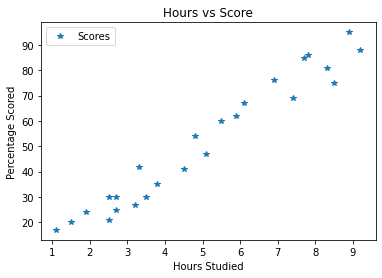

In [13]:
data.plot(x='Hours',y='Scores',style='*')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs Score')
plt.show()

**Now we can apply simple Linear Regression to predict the percentage of a student, given the number of hours of study.**

In [14]:
X = data.iloc[:, :-1].values
Y = data.iloc[:,1].values


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Completed training.")

Completed training.


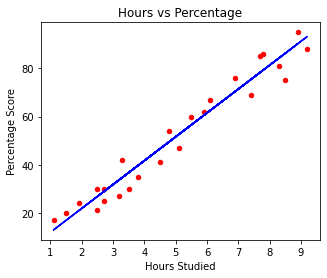

In [16]:
# Plotting the regression line
data.plot(kind='scatter',x='Hours',y='Scores',figsize=(5,4),color='r')
plt.plot(X_train, regressor.coef_[0] * X_train + regressor.intercept_,color='b')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [17]:
# Comparing Actual vs Predicted
print(X_test)
Y_pred = regressor.predict(X_test) # Predicting the scores
df = pd.DataFrame({'Actual_score': Y_test, 'Predicted_score': Y_pred})  
df

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual_score,Predicted_score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Evaluating the model**

In [19]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error : {}'.format(metrics.mean_absolute_error(Y_pred,Y_test)))
print("R2-score: %.2f" % r2_score(Y_pred, Y_test))

Mean Absolute Error : 4.183859899002982
R2-score: 0.95


Higher the r2 value higher is the accuracy of model.

**Predicting the score with the single input value**

In [20]:
hours = 9.25
predicted_score = regressor.predict([[hours]])
print(f'No. of hours = {hours}')
print(f'predicted Score  = {predicted_score[0]}')

No. of hours = 9.25
predicted Score  = 93.69173248737539
